<a href="https://colab.research.google.com/github/LuisManuelCatzoliSoriano/EDP-I/blob/main/Ecuuaci%C3%B3ndeonda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La ecuación de onda:

$ \frac{\partial^2 u}{\partial t^2}=c^2\frac{\partial^2 u}{\partial x^2}$

Con condiciones de frontera:

$u(0,t)=0$, $u(L,t)=0$ y $U(x,0)=f(x)$

Primero empezamos calculando los eigenvalores y las eigenfunciones:

In [4]:
from sympy import symbols, sin, pi, simplify

n, L_sym = symbols('n L', real=True, positive=True)

lambda_n = (n * pi / L_sym)**2
print("Eigenvalores (λₙ = (nπ/L)²):")
display(lambda_n)

x_sym = symbols('x')
phi_n = sin(n * pi * x_sym / L_sym)
print("Eigenfunciones φₙ(x) = sin(nπx / L):")
display(phi_n)

Eigenvalores (λₙ = (nπ/L)²):


pi**2*n**2/L**2

Eigenfunciones φₙ(x) = sin(nπx / L):


sin(pi*n*x/L)

Es importante aclarar que solo usaremos $sen$, ya que la serie en $cos$ solo aparecen cuando la condición es $\neq0$.

Ahora encontramos los valores de $λ$ en cada caso:

In [5]:
L_val = 1
print("n\tλₙ\t\tφₙ(x)")
for n_val in range(1, 6):
    lambda_n_val = (n_val * np.pi / L_val)**2
    print(f"{n_val}\t{lambda_n_val:.4f}\t\tsin({n_val}πx)")


n	λₙ		φₙ(x)
1	9.8696		sin(1πx)
2	39.4784		sin(2πx)
3	88.8264		sin(3πx)
4	157.9137		sin(4πx)
5	246.7401		sin(5πx)


Primero hacemos la gráfica en 1D:

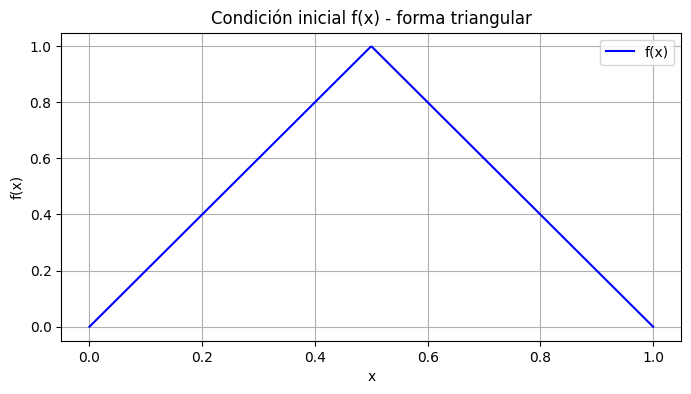

In [21]:
import numpy as np
import matplotlib.pyplot as plt

L = 1
x = np.linspace(0, L, 500)

def f(x):
    return np.where(x <= L/2, 2*x, 2*(L - x))

fx = f(x)

plt.figure(figsize=(8, 4))
plt.plot(x, fx, label='f(x)', color='blue')
plt.title('Condición inicial f(x) - forma triangular')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()


Con ayuda de lo anterior podemos elaborar la gráfica de ecuación de la onda:

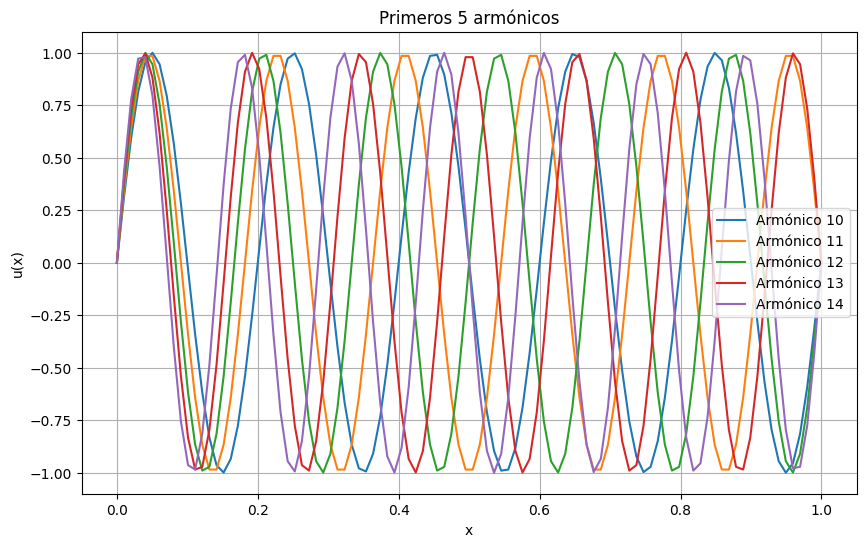

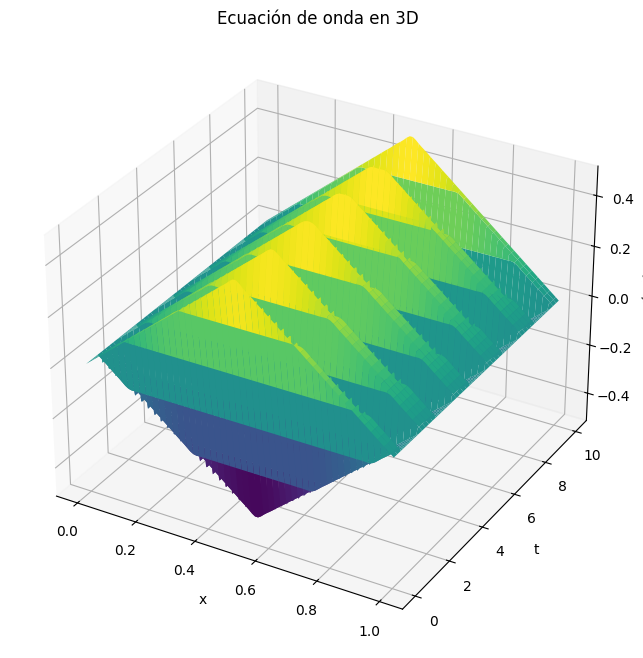

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

L = 1
c = 1
N = 50
nx = 100
nt = 300
T = 10

x = np.linspace(0, L, nx)
t = np.linspace(0, T, nt)
u = np.zeros((nt, nx))

def f(x):
    return np.where(x <= L/2, 2*x, 2*(L - x))

def An(n):
    return 4 / (n * np.pi)**2 * np.sin(n * np.pi / 2)

for i, ti in enumerate(t):
    sum_modes = np.zeros_like(x)
    for n in range(1, N+1):
        an = An(n)
        kn = n * np.pi / L
        sum_modes += an * np.sin(kn * x) * np.cos(c * kn * ti)
    u[i, :] = sum_modes

plt.figure(figsize=(10, 6))
for n in range(10, 15):
    kn = n * np.pi / L
    plt.plot(x, np.sin(kn * x), label=f"Armónico {n}")
plt.title("Primeros 5 armónicos")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid()
plt.show()

X, T_grid = np.meshgrid(x, t)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T_grid, u, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.set_title("Ecuación de onda en 3D")
plt.show()

